In [373]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.output_parsers import StrOutputParser
from typing import Literal
load_dotenv()

True

In [374]:
llm = ChatOpenAI (model='gpt-4o-mini')
str_parser = StrOutputParser()

In [375]:
# define state
class state(TypedDict):
    a: float
    b: float
    c: float

    equation: str
    discriminant: float
    result: str

In [376]:
# Define the graph
graph = StateGraph(state)

In [377]:
def equation(state: state) -> state:
    equation = f"{state['a']}x^2 {state['b']}x {state['c']}"
    return {"equation": equation}

In [378]:
def discriminant(state: state) -> state:
    discriminant = state["b"] ** 2 - (4 * state["a"] * state["c"])
    return {"discriminant": discriminant}

In [379]:
def real_roots(state: state) -> state:
    d = state["discriminant"]
    root1 = (-state["b"] + d**0.5) / (2 * state["a"])
    root2 = (-state["b"] - d**0.5) / (2 * state["a"])
    result = f"The equation has two real roots: {root1} and {root2}."
    return {"result": result}

In [380]:
def repeated_roots(state: state) -> state:
    root = -state["b"] / (2 * state["a"])
    result = f"The equation has one repeated real root: {root}."
    return {"result": result}

In [381]:
def no_real_roots(state: state) -> state:
    result = "The equation has no real roots."
    return {"result": result}

In [382]:
def check_connection(
    state: state,
) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    d = state["discriminant"]
    if d == 0:
        return "repeated_roots"
    elif d > 0:
        return "real_roots"
    else:
        return "no_real_roots"

In [383]:
# add nodes
graph.add_node("equation", equation)
graph.add_node("discriminant", discriminant)

# conditional nodes
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("no_real_roots", no_real_roots)

In [384]:
# add edges
graph.add_edge(START, "equation")
graph.add_edge("equation", "discriminant")

# condiational edges
graph.add_conditional_edges("discriminant", check_connection)
graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)
graph.add_edge("no_real_roots", END)

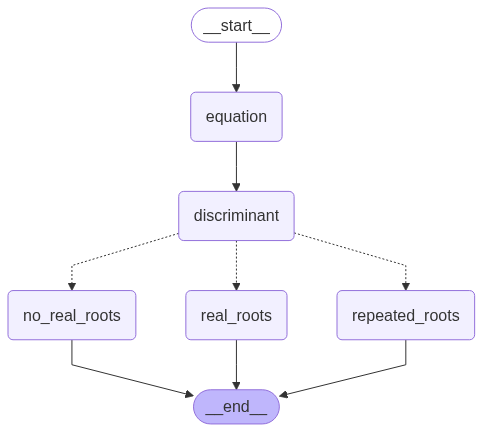

In [385]:
# compile the graph
work_flow = graph.compile()
work_flow


In [386]:
# execute the graph

initial_state = {
    "a":4,
    "b":-5,
    "c":-4
}

final_state = work_flow.invoke(initial_state)

In [387]:
# print state
final_state 


{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x^2 -5x -4',
 'discriminant': 89,
 'result': 'The equation has two real roots: 1.8042476415070754 and -0.5542476415070754.'}